In [448]:
# Author : Senbagaraman 
# Github: https://github.com/senbagaraman04/ml-basics/tree/main/2023
# Dataset: https://archive.ics.uci.edu/ml/datasets/parkinsons
# Type: Classficiation problem : Predict whether the patient has parkinson disease or not.


# Parkinson Diesease Dataset from UCI 

## Import the libraries

In [449]:
# import the libraries 
import pandas as pd
import numpy as np


## Load and view the dataset 

In [450]:
# Read the Dataset 

df = pd.read_csv('./parkinsons.data')

df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


| Column Title | Column Description |
| ---- | ---- |
| name | ASCII subject name and recording number|
| MDVP:Fo(Hz) | Average vocal fundamental frequency |
| MDVP:Fhi(Hz) | Maximum vocal fundamental frequency |
| MDVP:Flo(Hz) | Minimum vocal fundamental frequency |
| MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP | Several measures of variation in fundamental frequency |
| MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA | Several measures of variation in amplitude |
| NHR,HNR| Two measures of ratio of noise to tonal components in the voice|
| status | Health status of the subject (one) - Parkinson's, (zero) - healthy |
| RPDE,D2 | Two nonlinear dynamical complexity measures |
| DFA | Signal fractal scaling exponent |
| spread1,spread2,PPE  | Three nonlinear measures of fundamental frequency variation |


In [451]:
# find the head 

df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [452]:
df.shape

(195, 24)

195 rows and 24 columns.

## Find the datatype and Not-null columns

In [453]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

Here the `status` column is only of type int64- which is also the decision column.

In [454]:
# Not null

df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

There is no null or missing values in the dataset. 

## EDA

In [455]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [456]:
# Remove the status column to variable y and drop name and status from the df
x=df.drop(columns=['name','status'],axis=1)
y=df['status']

# reassign df to x, for easy usage
df = x



In [457]:
import matplotlib.pyplot as plt
import sklearn
sklearn.set_config(print_changed_only=True)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Histogram for the given dataset

Statistical plot of displaying the frequency of the distribution


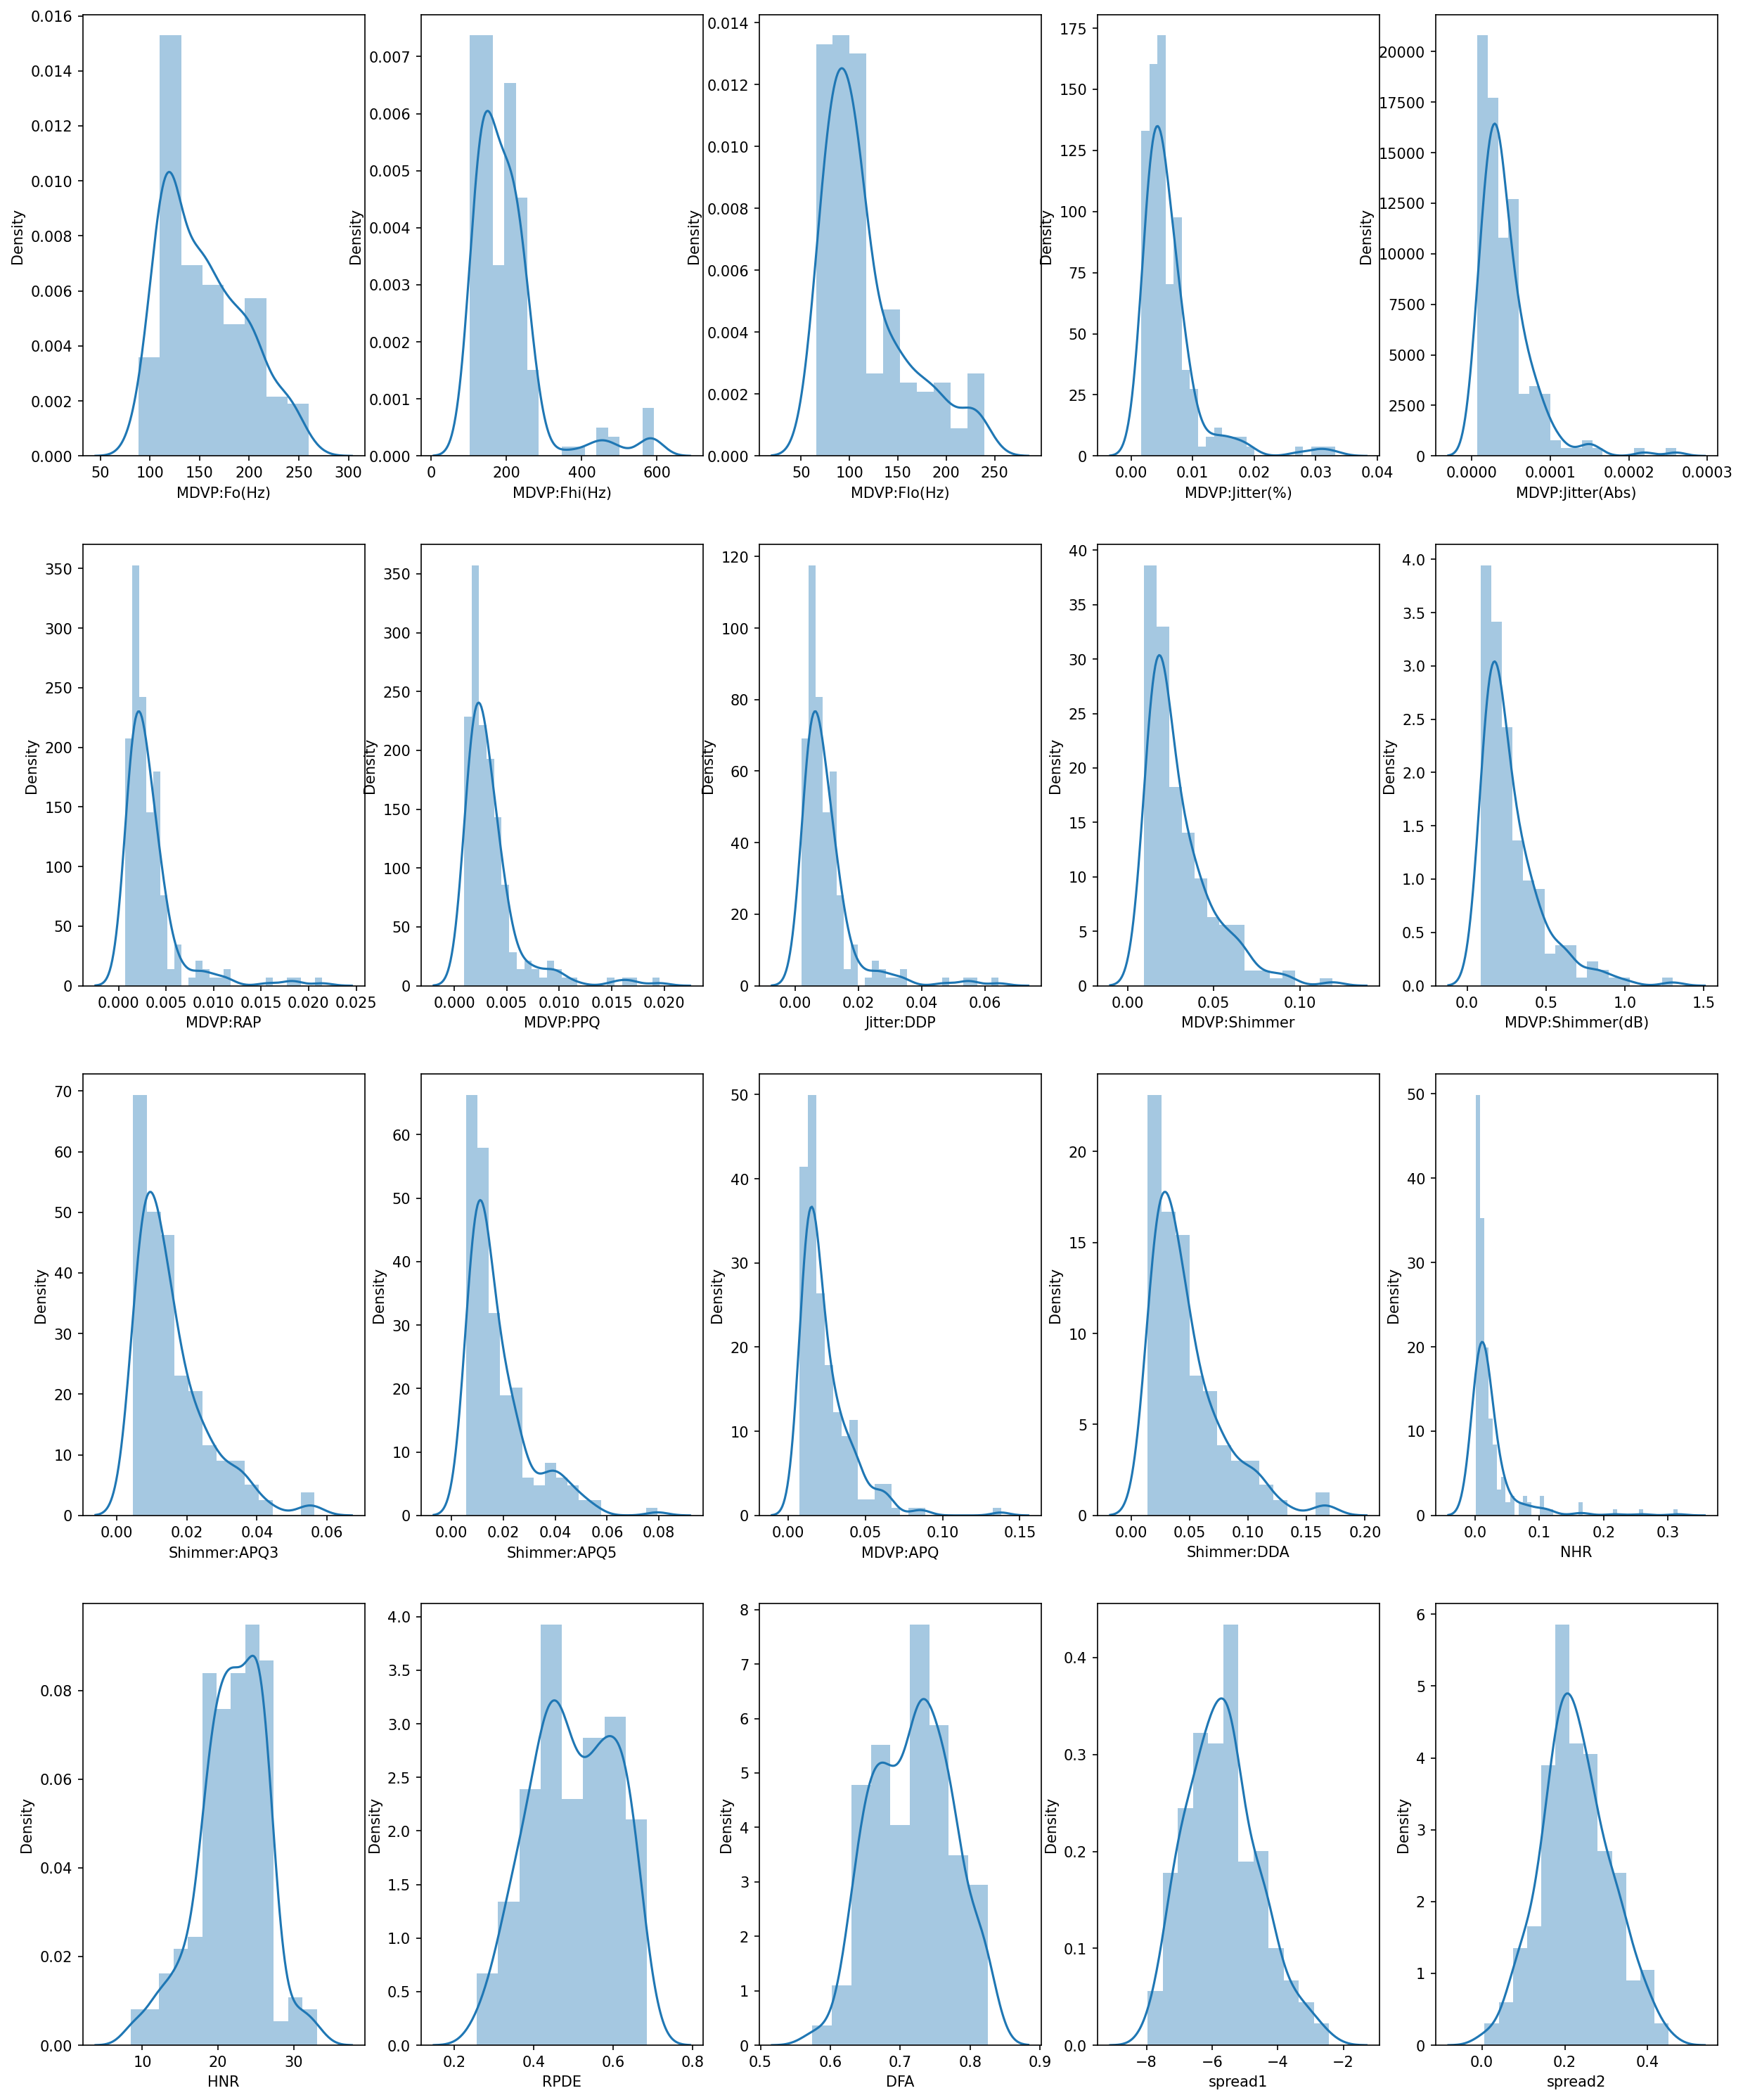

In [458]:
# Create histogram for features using subplot.
fig, axis = plt.subplots(nrows = 4, ncols = 5, figsize = (20, 25), dpi = 150) 

count = 0

for i in range(0, 4):
  for j in range (0, 5):
    column = df.iloc[:, count]      # Fetching the current column and all rows of that column.
    #print(i,j)
    sns.distplot(column, hist = True, ax = axis[i, j])
    count = count + 1

plt.show()

## Split the data

In [459]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test = train_test_split(df,y,test_size=0.2,random_state=2)



## Type 1: Using Normalization

In [460]:
#Normalize the given data's
from sklearn import preprocessing
import pandas as pd
scaler = preprocessing.MinMaxScaler()
names = x_train.columns
d = scaler.fit_transform(x_train)
x_train = pd.DataFrame(d, columns=names)
x_train.head()




,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,0.535752,0.195116,0.078938,0.214104,0.169960,0.210983,0.191318,0.210788,0.141410,0.119967,...,0.092810,0.174529,0.055639,0.420345,0.777883,0.632493,0.455589,0.306588,0.334103,0.354203
1,0.132782,0.045429,0.066473,0.131194,0.169960,0.111272,0.120043,0.111093,0.278894,0.263763,...,0.259974,0.214493,0.063914,0.487523,0.925307,0.479646,0.502445,0.569438,0.323789,0.415073
2,0.391894,0.145348,0.016840,0.060356,0.051383,0.061657,0.055734,0.061487,0.252145,0.182416,...,0.156597,0.307742,0.024986,0.559945,0.573544,0.549821,0.309813,0.409217,0.320554,0.240817
3,0.150831,0.056788,0.258650,0.185515,0.209486,0.111272,0.202036,0.111414,0.122238,0.111750,...,0.094111,0.139327,0.019607,0.584248,0.639223,0.970840,0.606898,0.638762,0.266165,0.559050
4,0.547862,0.193808,0.584367,0.028590,0.011858,0.031792,0.029475,0.031947,0.046467,0.038620,...,0.039436,0.052964,0.006111,0.732017,0.116368,0.737363,0.166496,0.128626,0.417393,0.147446


In [461]:
scaler = preprocessing.MinMaxScaler()
names = x_test.columns
d = scaler.fit_transform(x_test)
x_test = pd.DataFrame(d, columns=names)

### Logistic Regression 




In [462]:
from sklearn.linear_model import LogisticRegression
normalized_LR = LogisticRegression()

In [463]:
normalized_LR.fit(x_train, y_train)
y_pred= normalized_LR.predict(x_test)

In [464]:
# Define a DataFrame to store the classifier performance metrics
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score



results_df = pd.DataFrame(
    data=[["Logistic Regression(Normalized)", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Save the confusion matrix for the Logistic Regression
#cm = confusion_matrix(y_test, y_pred)
#disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)

# Customise and display the confusion matrix appearance
# disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
# plt.title("Logistic Regression", fontweight= "bold")
#plt.show()

# Display the performance metric DataFrame
print(results_df)

                             Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression(Normalized)  0.820513   0.852941  0.935484  0.892308


### KNN-CLassifier

In [465]:
from sklearn.neighbors import KNeighborsClassifier


normalized_knn = KNeighborsClassifier()
normalized_knn.fit(x_train,y_train)
y_pred = normalized_knn.predict(x_test)

results_knn = pd.DataFrame(
    data=[["KNN (Normalized)", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_df = results_df.append(results_knn, ignore_index=True)


results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression(Normalized),0.820513,0.852941,0.935484,0.892308
1,KNN (Normalized),0.897436,0.965517,0.903226,0.933333


### SVC 

In [466]:
from sklearn.svm import SVC

normalized_svc = SVC(gamma=.1).fit(x_train, y_train)

y_pred= normalized_svc.predict(x_test)


svc_results_df = pd.DataFrame(
    data=[["SVC Classifier(Normalized)", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_df = results_df.append(svc_results_df, ignore_index=True)

results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression(Normalized),0.820513,0.852941,0.935484,0.892308
1,KNN (Normalized),0.897436,0.965517,0.903226,0.933333
2,SVC Classifier(Normalized),0.871795,0.861111,1.000000,0.925373


### Decision Tree

In [467]:
from sklearn.tree import DecisionTreeClassifier

normalized_dt = DecisionTreeClassifier()
normalized_dt.fit(x_train,y_train)
y_pred = normalized_dt.predict(x_test)

dt_results = pd.DataFrame(
    data=[["Decision Tree(Normalized)", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_df = results_df.append(dt_results, ignore_index=True)

results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression(Normalized),0.820513,0.852941,0.935484,0.892308
1,KNN (Normalized),0.897436,0.965517,0.903226,0.933333
2,SVC Classifier(Normalized),0.871795,0.861111,1.000000,0.925373
3,Decision Tree(Normalized),0.692308,0.827586,0.774194,0.800000


### Random Forest

In [468]:
from sklearn.ensemble import RandomForestClassifier

 
rf_model= RandomForestClassifier(max_depth=4)
rf_model.fit(x_train, y_train)

 
y_pred= rf_model.predict(x_test)


rf_results_df = pd.DataFrame(
    data=[["Random Forest(Normalized)(maxDepth(4))", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_df = results_df.append(rf_results_df, ignore_index=True)


results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression(Normalized),0.820513,0.852941,0.935484,0.892308
1,KNN (Normalized),0.897436,0.965517,0.903226,0.933333
2,SVC Classifier(Normalized),0.871795,0.861111,1.000000,0.925373
3,Decision Tree(Normalized),0.692308,0.827586,0.774194,0.800000
4,Random Forest(Normalized)(maxDepth(4)),0.820513,0.852941,0.935484,0.892308


The max depth here is a randomly chosen number and it visibile that, the model is not performing well, when compared to 
other models trained till now. The following piece of code runs the depth from 1 to 24 and find the best depth.

In [469]:
from sklearn.model_selection import cross_val_score


def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    #print(cv_scores_mean, cv_scores_std, accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# fitting trees of depth 1 to 24
sm_tree_depths = range(1,24)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(x_train, y_train, sm_tree_depths)

idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))


The depth-14 tree achieves the best mean cross-validation accuracy 87.15726 +/- 4.60614% on training dataset


In [470]:
from sklearn.ensemble import RandomForestClassifier

 
rf_model= RandomForestClassifier(max_depth=sm_best_tree_depth)
rf_model.fit(x_train, y_train)

 
y_pred= rf_model.predict(x_test)


rf_results_df = pd.DataFrame(
    data=[['Random Forest(Normalized)(maxDepth())', accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_df = results_df.append(rf_results_df, ignore_index=True)


results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression(Normalized),0.820513,0.852941,0.935484,0.892308
1,KNN (Normalized),0.897436,0.965517,0.903226,0.933333
2,SVC Classifier(Normalized),0.871795,0.861111,1.000000,0.925373
3,Decision Tree(Normalized),0.692308,0.827586,0.774194,0.800000
4,Random Forest(Normalized)(maxDepth(4)),0.820513,0.852941,0.935484,0.892308
5,Random Forest(Normalized)(maxDepth()),0.820513,0.852941,0.935484,0.892308


### Stochastic Gradient Descent

In [471]:
from sklearn.linear_model import SGDClassifier


sgd =  SGDClassifier(shuffle=True)
sgd.fit(x_train, y_train)
y_pred=sgd.predict(x_test)

rf_results_df = pd.DataFrame(
    data=[["SGD(Normalized)", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_df = results_df.append(rf_results_df, ignore_index=True)


results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression(Normalized),0.820513,0.852941,0.935484,0.892308
1,KNN (Normalized),0.897436,0.965517,0.903226,0.933333
2,SVC Classifier(Normalized),0.871795,0.861111,1.000000,0.925373
3,Decision Tree(Normalized),0.692308,0.827586,0.774194,0.800000
4,Random Forest(Normalized)(maxDepth(4)),0.820513,0.852941,0.935484,0.892308
5,Random Forest(Normalized)(maxDepth()),0.820513,0.852941,0.935484,0.892308
6,SGD(Normalized),0.820513,0.875000,0.903226,0.888889


### Bagging



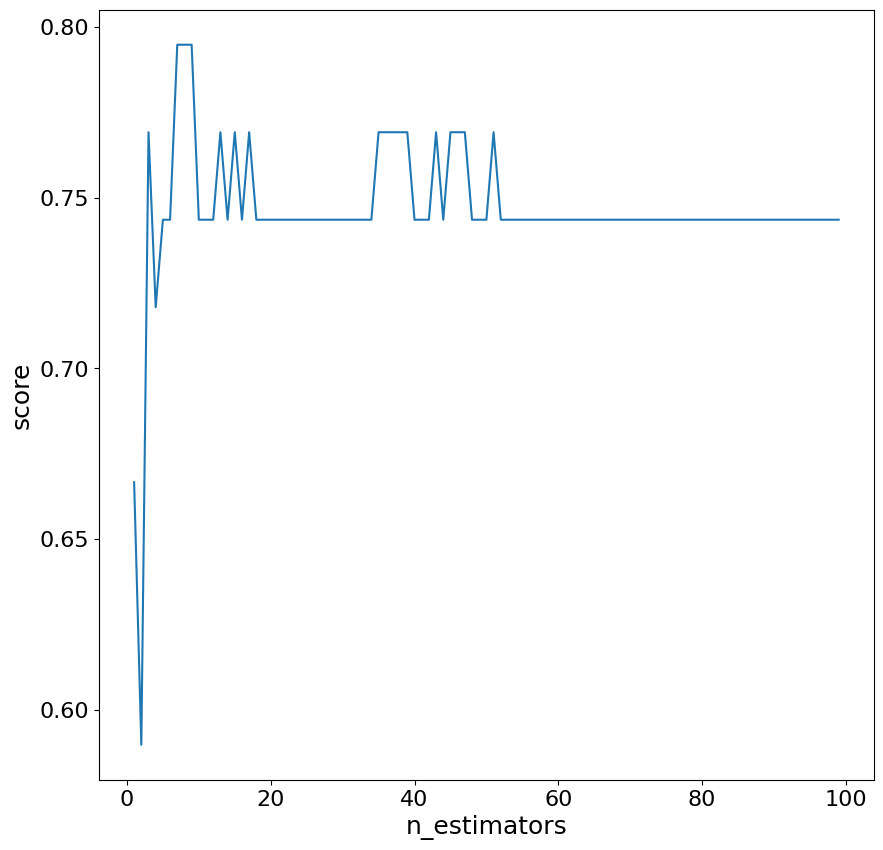

[0.6666666666666666, 0.5897435897435898, 0.7692307692307693, 0.717948717948718, 0.7435897435897436, 0.7435897435897436, 0.7948717948717948, 0.7948717948717948, 0.7948717948717948, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7692307692307693, 0.7435897435897436, 0.7692307692307693, 0.7435897435897436, 0.7692307692307693, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7692307692307693, 0.7692307692307693, 0.7692307692307693, 0.7692307692307693, 0.7692307692307693, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7692307692307693, 0.7435897435897436, 0.7692307692307693, 0.7692307692307693, 0.7692307692307693, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 

In [472]:
from sklearn.ensemble import BaggingClassifier


estimator_range = range(1,100)

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(x_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(x_test)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(10,10))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

print(scores)